In [1]:
import numpy as np
import sys
sys.path.append("../")
import SRT_optimization as srt
import matplotlib.pyplot as plt
import scipy

In [2]:
NESG_targets={}
with open('globular_proteins.dat','r') as f:
    for line in f:
        if line.startswith('#'):
            pass
        else:
            data=line.split()
            NESG_targets[data[0]]={}
            NESG_targets[data[0]]['MW']=float(data[2])
            NESG_targets[data[0]]['T1']=float(data[3])
            NESG_targets[data[0]]['T2']=float(data[4])
            NESG_targets[data[0]]['corrT']=float(data[6])

In [3]:
nu_N=0
for protein,data in NESG_targets.items():
    print(protein, np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9)))
    nu_N+=(np.sqrt(6*data['T1']/data['T2']-7))/(4*np.pi*data['corrT']*10**(-9))/len(NESG_targets)
print(f'nu_N: {nu_N}')

PsR76A 61244688.537164114
VfR117 61238189.0296029
SyR11 60716591.36654701
ER541-37-162 61007660.54650734
ER540 60993823.42022128
SoR190 60682339.5547393
TR80 60935916.8892931
Ubiquitin 60882123.01556322
HR2873B 60322923.67451021
B-domain 60801216.770046435
BcR97A 61025096.24904496
PfR193A 60894059.12305778
MvR76 60986293.62227959
DvR115G 60713642.93241942
MrR110B 61010842.234176725
VpR247 60880465.07797666
BcR147A 60749689.17993713
WR73 81254039.56774645
NsR431C 60568999.869445205
StR82 60417919.59317727
nu_N: 61866326.012672804


In [4]:
gammaN=-27.166*10**6;
gammaH=267.513*10**6;


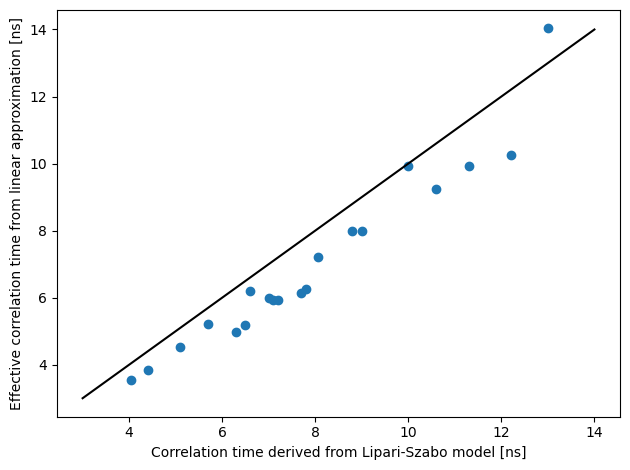

In [47]:
for protein,data in NESG_targets.items():
    nu_N=np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9))
    magn_field_MHz=(-1)* nu_N / gammaN *gammaH/10**6 
    #print(f"{data['corrT']:>6.2f} {srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9:>6.2f}")
    NESG_targets[protein]['app_effT']=srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9
    plt.plot(data['corrT'],NESG_targets[protein]['app_effT'],'o',c='C0')

plt.plot([3,14],[3,14],'-',c='black')
plt.xlabel('Correlation time derived from Lipari-Szabo model [ns]')
plt.ylabel('Effective correlation time from linear approximation [ns]')
plt.savefig("globular_proteins_compare_to_literature.pdf")

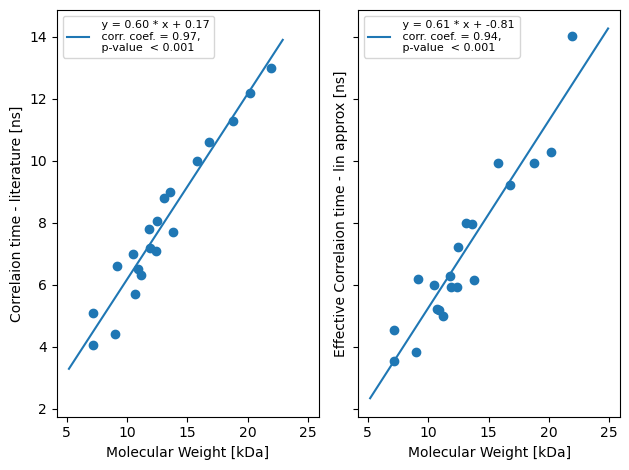

In [46]:
weights=[]
corr=[]
eff=[]
plt.rcParams['figure.autolayout']=True
fig, axs = plt.subplots(1,2,sharey=True,sharex=True)
for protein,data in NESG_targets.items():
    nu_N=np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9))
    magn_field_MHz=(-1)* nu_N / gammaN *gammaH/10**6 
    #print(f"{data['corrT']:>6.2f} {srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9:>6.2f}")
    NESG_targets[protein]['app_effT']=srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9
    axs[0].plot(data['MW'],data['corrT'],'o',c='C0')
    axs[1].plot(data['MW'],NESG_targets[protein]['app_effT'],'o',c='C0')
    weights.append(data['MW'])
    corr.append(data['corrT'])
    eff.append(NESG_targets[protein]['app_effT'])

    
coeff = np.polyfit(weights, corr,1,full=True)
xn = np.linspace(min(weights)-2,max(weights)+1,10)
yn = np.poly1d(coeff[0])
r, p = scipy.stats.pearsonr(weights, corr)
if p < 0.001:
    p=" < 0.001"
else:
    p=" = "+str(np.round(p,3))
axs[0].plot(xn,yn(xn),"-",label=f" y = {coeff[0][0]:.2f} * x + {coeff[0][1]:.2f}\n corr. coef. = {(np.round(r,2))},\n p-value {p}")    


coeff = np.polyfit(weights, eff,1,full=True)
xn = np.linspace(min(weights)-2,max(weights)+3,10)
yn = np.poly1d(coeff[0])
r, p = scipy.stats.pearsonr(weights, eff)
if p < 0.001:
    p=" < 0.001"
else:
    p=" = "+str(np.round(p,3))
axs[1].plot(xn,yn(xn),"-",label=f" y = {coeff[0][0]:.2f} * x + {coeff[0][1]:.2f}\n corr. coef. = {(np.round(r,2))},\n p-value {p}")    


#plt.plot([3,14],[3,14],'-',c='black')
axs[0].set_xlabel('Molecular Weight [kDa]')
axs[1].set_xlabel('Molecular Weight [kDa]')
axs[0].set_ylabel('Correlaion time - literature [ns]')
axs[1].set_ylabel('Effective Correlaion time - lin approx [ns]')
axs[0].legend(prop={'size':8},loc=2)
axs[1].legend(prop={'size':8},loc=2)
plt.savefig("MW_vs_time.pdf")




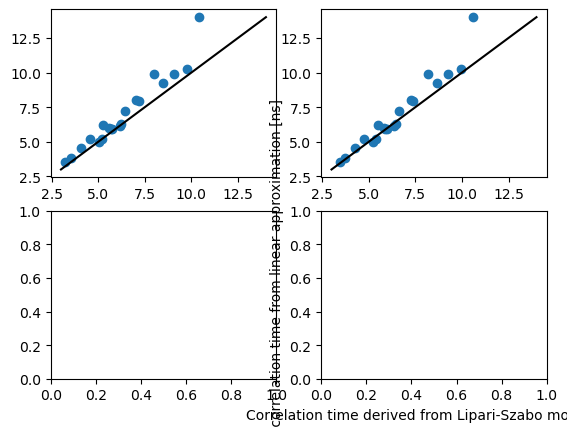

In [10]:
fig,axs = plt.subplots(2,2)
for protein,data in NESG_targets.items():
    nu_N=np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9))
    magn_field_MHz=(-1)* nu_N / gammaN *gammaH/10**6 
    #print(f"{data['corrT']:>6.2f} {srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9:>6.2f}")
    NESG_targets[protein]['app_effT']=srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9
    axs[0,0].plot(data['corrT']*0.8+0.2*0.01,NESG_targets[protein]['app_effT'],'o',c='C0')
    axs[0,1].plot(data['corrT']*0.8+0.2*1,NESG_targets[protein]['app_effT'],'o',c='C0')

axs[0,0].plot([3,14],[3,14],'-',c='black')
axs[0,1].plot([3,14],[3,14],'-',c='black')
plt.xlabel('Correlation time derived from Lipari-Szabo model [ns]')
plt.ylabel('Effective correlation time from linear approximation [ns]')
plt.savefig("globular_proteins_compare_to_literature2.png")

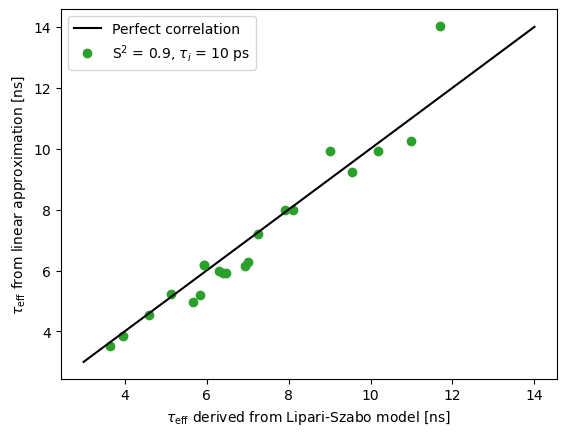

In [7]:
for protein,data in NESG_targets.items():
    nu_N=np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9))
    magn_field_MHz=(-1)* nu_N / gammaN *gammaH/10**6 
    #print(f"{data['corrT']:>6.2f} {srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9:>6.2f}")
    NESG_targets[protein]['app_effT']=srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9
    #plt.plot(data['corrT']*0.8+0.2*0.01,NESG_targets[protein]['app_effT'],'o',c='C0')
    #plt.plot(data['corrT']*0.8+0.2*1,NESG_targets[protein]['app_effT'],'o',c='C1')
    plt.plot(data['corrT']*0.9+0.1*0.01,NESG_targets[protein]['app_effT'],'o',c='C2')
    #plt.plot(data['corrT'],NESG_targets[protein]['app_effT'],'o',c='C3')

plt.plot([3,14],[3,14],'-',c='black',label='Perfect correlation')
#plt.plot(data['corrT']*0.8+0.2*0.01,NESG_targets[protein]['app_effT'],'o',c='C0',label=f'S$^2$ = 0.8, t_inter = 10 ps')
#plt.plot(data['corrT']*0.8+0.2*1,NESG_targets[protein]['app_effT'],'o',c='C1',label=f'S$^2$ = 0.8, t_inter = 1 ns')
plt.plot(data['corrT']*0.9+0.1*0.01,NESG_targets[protein]['app_effT'],'o',c='C2',label=r'S$^2$ = 0.9, $\tau_i$ = 10 ps')
#plt.plot(data['corrT'],NESG_targets[protein]['app_effT'],'o',c='C3',label=f'S$^2$ = 1, t_inter = None')



plt.legend()
plt.xlabel(r'$\tau_{\mathrm{eff}}$ derived from Lipari-Szabo model [ns]')
plt.ylabel(r'$\tau_{\mathrm{eff}}$ from linear approximation [ns]')
plt.savefig("globular_proteins_compare_to_literature2.pdf")